In [1]:
import torch

# tensor 생성
x = torch.tensor([1., 2., 3.])
print(x)

if torch.cuda.is_available():
    x = x.to('cuda')
    print('Able to use!')
    print(x)
else:
    print('unable!')

tensor([1., 2., 3.])
Able to use!
tensor([1., 2., 3.], device='cuda:0')


In [2]:
import torchvision
import torchvision.transforms as transforms
# 전처리 과정
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
])

# 데이터셋 로딩
train = torchvision.datasets.MNIST(root='/content/drive/MyDrive/한국직업전문학교(2024.06)/실습/datas', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)

test = torchvision.datasets.MNIST(root='/content/drive/MyDrive/한국직업전문학교(2024.06)/실습/datas', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15866545.17it/s]


Extracting /content/drive/MyDrive/한국직업전문학교(2024.06)/실습/datas/MNIST/raw/train-images-idx3-ubyte.gz to /content/drive/MyDrive/한국직업전문학교(2024.06)/실습/datas/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 524194.98it/s]


Extracting /content/drive/MyDrive/한국직업전문학교(2024.06)/실습/datas/MNIST/raw/train-labels-idx1-ubyte.gz to /content/drive/MyDrive/한국직업전문학교(2024.06)/실습/datas/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4525647.85it/s]


Extracting /content/drive/MyDrive/한국직업전문학교(2024.06)/실습/datas/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/drive/MyDrive/한국직업전문학교(2024.06)/실습/datas/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5729482.34it/s]


Extracting /content/drive/MyDrive/한국직업전문학교(2024.06)/실습/datas/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/drive/MyDrive/한국직업전문학교(2024.06)/실습/datas/MNIST/raw



In [10]:
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5) # 1: 입력 채널, 6: 출력 채널, 5: 커널(필터) 크기
        self.pool = nn.MaxPool2d(2, 2) # 2: 커널 크기, 2: 스트라이드(보폭)
        self.conv2 = nn.Conv2d(6, 16, 5) # 6: 입력 채널, 16: 출력 채널, 5: 커널 크기
        self.fc1 = nn.Linear(16*4*4, 120) # 16*4*4: 입력, 120: 출력
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16*4*4) # flatten
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [11]:
# device = torch.device("mps" if torch.backends.mps.is_available() else "cpu") # MacOS

net = SimpleCNN().to('cuda')

In [13]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01,)

In [14]:
num_epochs = 5
train_val_loss = []
val_loss_values = []

for epoch in range(num_epochs):
    running_loss = 0.0
    net.train() # 모델을 학습 모델로 변경
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to('cuda'), labels.to('cuda')

        optimizer.zero_grad() # 모든 변화율(gradient)을 0으로 초기화
        outputs = net(inputs) # 순전파

        loss = criterion(outputs, labels) # 손실 함수 계산
        loss.backward() # 역전파
        optimizer.step() # 변화율을 사용하여 가중치 업데이트

        running_loss += loss.item()
        if i % 100 == 99: # 100번째 미니배치마다 손실 출력
            train_val_loss.append(running_loss / 100)
            print(f"Epoch {epoch+1}, Batch {i+1}: Train Loss: {running_loss / 100}")
            running_loss = 0.0

    # 검증 손실 계산
    net.eval() # 모델을 평가 모델로 변경
    val_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            inputs, labels = inputs.to('cuda'), labels.to('cuda')
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    val_loss /= len(test_loader)
    val_loss_values.append(val_loss)
    print(f"Epoch {epoch+1}: Validation Loss: {val_loss}")

print('Finish!')



Epoch 1, Batch 100: Train Loss: 0.5658106201887131
Epoch 1, Batch 200: Train Loss: 0.17014285741373897
Epoch 1, Batch 300: Train Loss: 0.14710658946074545
Epoch 1, Batch 400: Train Loss: 0.1131138102337718
Epoch 1, Batch 500: Train Loss: 0.11702452706173062
Epoch 1, Batch 600: Train Loss: 0.1272005935222842
Epoch 1, Batch 700: Train Loss: 0.09953186166472733
Epoch 1, Batch 800: Train Loss: 0.11154455686919391
Epoch 1, Batch 900: Train Loss: 0.11502185435965658
Epoch 1: Validation Loss: 0.08348096320205398
Epoch 2, Batch 100: Train Loss: 0.0773880697763525
Epoch 2, Batch 200: Train Loss: 0.08682329127099365
Epoch 2, Batch 300: Train Loss: 0.08329304377315566
Epoch 2, Batch 400: Train Loss: 0.10021028124727309
Epoch 2, Batch 500: Train Loss: 0.11436485370388255
Epoch 2, Batch 600: Train Loss: 0.08265287702670321
Epoch 2, Batch 700: Train Loss: 0.08047222786059137
Epoch 2, Batch 800: Train Loss: 0.1110469306120649
Epoch 2, Batch 900: Train Loss: 0.08221646920428612
Epoch 2: Validation Los

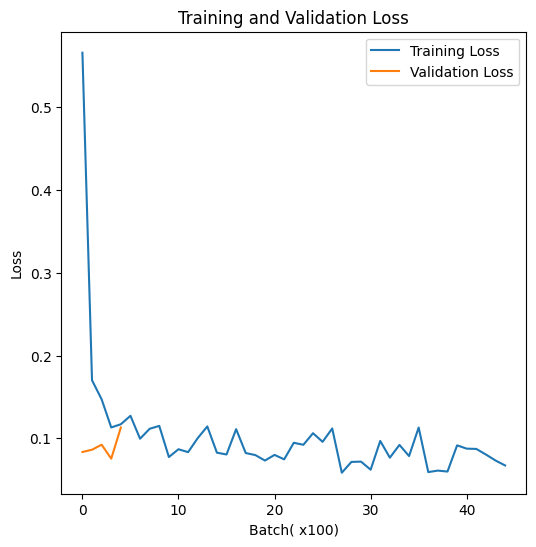

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.plot(train_val_loss, label='Training Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.xlabel('Batch( x100)')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

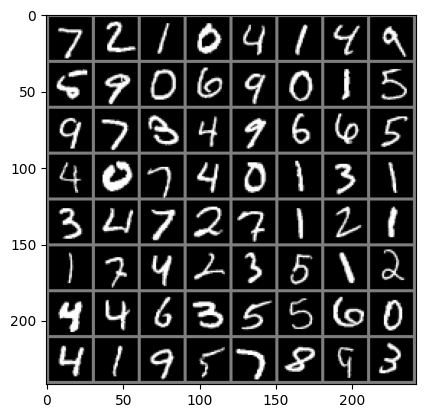

Predicted:  7 2 1 0 4 1 4 9
Ground Truth:  7 2 1 0 4 1 4 9


In [18]:
import numpy as np

def imshow(img):
    img = img / 2 + 0.5 # 역정규화
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 테스트 데이터 예측
dataiter = iter(test_loader)
images, labels = next(dataiter)

# 이미지 출력
imshow(torchvision.utils.make_grid(images))

# 예측 출력
images, labels = images.to('cuda'), labels.to('cuda')
outputs = net(images)
_, predicted = torch.max(outputs, 1)

# 예측 결과와 실제 레이블 출력
print('Predicted: ', ' '.join(f"{predicted[j].item()}" for j in range(8)))
print('Ground Truth: ', ' '.join(f"{labels[j].item()}" for j in range(8)))